# Customer Churn Prediction with Machine Learning

## Project Overview

This project demonstrates the process of building and evaluating a machine learning model to predict customer churn for a telecom company. It covers data loading, extensive preprocessing, feature scaling, model training, and performance evaluation, culminating in identifying key factors influencing churn.

**Developed with guidance from Google's Gemini AI.**

## Step 1: Project Setup and Data Acquisition

This section handles the initial setup of the Google Colab environment and the loading of the Telco Customer Churn dataset from Google Drive.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 2: Load and Initial Explore the Dataset

Here, the dataset is loaded into a Pandas DataFrame. An initial exploration is performed to understand the data's structure, identify data types, and check for basic statistics and class distribution of the target variable ('Churn').

In [9]:
import pandas as pd

csv_file_path = '/content/drive/MyDrive/Colab Notebooks/CustomerChurn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(csv_file_path)

print("--- First 5 rows of the DataFrame: ---")
print(df.head())

print("\n--- DataFrame Info (Column types and non-null counts): ---")
print(df.info())

print("\n--- Basic Statistical Summary of Numeric Columns: ---")
print(df.describe())

print("\n--- Unique values in 'Churn' column (Our target variable): ---")
print(df['Churn'].value_counts())

--- First 5 rows of the DataFrame: ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Streaming

## Step 3: Data Cleaning and Preprocessing

This is a critical step to prepare the raw data for machine learning. It involves:
- Handling missing values (specifically in 'TotalCharges').
- Correcting data types (converting 'TotalCharges' to numeric).
- Encoding categorical variables into numerical format suitable for models (using binary mapping and One-Hot Encoding).
- Removing irrelevant columns like 'customerID'.

In [10]:
import numpy as np

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

df.drop('customerID', axis=1, inplace=True)

for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[col] = df[col].replace({'No internet service': 'No'})
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

categorical_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("--- DataFrame Info after cleaning and encoding: ---")
print(df.info())

print("\n--- First 5 rows of the processed DataFrame: ---")
print(df.head())

--- DataFrame Info after cleaning and encoding: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_Yes   

## Step 4: Feature Scaling and Data Splitting

In this step, numerical features are scaled to standardize their range, which helps optimize model performance. The dataset is then split into training and testing sets to ensure an unbiased evaluation of the model's ability to generalize to unseen data. Stratified splitting is used to maintain the proportion of churners in both sets.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn', axis=1)
y = df['Churn']

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("--- Shape of X_train (features for training): ---")
print(X_train.shape)
print("\n--- Shape of X_test (features for testing): ---")
print(X_test.shape)
print("\n--- Shape of y_train (target for training): ---")
print(y_train.shape)
print("\n--- Shape of y_test (target for testing): ---")
print(y_test.shape)

print("\n--- First 5 rows of X_train after scaling: ---")
print(X_train.head())

--- Shape of X_train (features for training): ---
(5634, 23)

--- Shape of X_test (features for testing): ---
(1409, 23)

--- Shape of y_train (target for training): ---
(5634,)

--- Shape of y_test (target for testing): ---
(1409,)

--- First 5 rows of X_train after scaling: ---
        gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
3738 -0.990532      -0.439916 -0.966622   -0.654012  0.107048     -3.054010   
3151 -0.990532      -0.439916  1.034530    1.529024 -0.707359      0.327438   
4860 -0.990532      -0.439916  1.034530    1.529024 -0.788800     -3.054010   
3867  1.009559      -0.439916  1.034530   -0.654012 -0.259435      0.327438   
3810 -0.990532      -0.439916  1.034530    1.529024 -1.277445      0.327438   

      PaperlessBilling  MonthlyCharges  TotalCharges  MultipleLines_Yes  ...  \
3738         -1.205113       -0.517207     -0.256176              False  ...   
3151         -1.205113        0.343603     -0.499034              False  ...   
4860

## Step 5: Model Training - Random Forest Classifier

A Random Forest Classifier, an ensemble machine learning model, is trained on the prepared training data. This model learns the complex patterns and relationships between customer features and their churn status.

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Step 6: Model Evaluation

The performance of the trained Random Forest model is rigorously evaluated using key metrics on the unseen test data. Metrics include Accuracy, Precision, Recall, F1-Score, and ROC AUC score, along with a Classification Report and Confusion Matrix, providing a comprehensive understanding of the model's predictive capability.

--- Model Evaluation ---
Accuracy: 0.7878
Precision: 0.6246
Recall: 0.5027
F1-Score: 0.5570
ROC AUC Score: 0.8287

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


--- Confusion Matrix ---


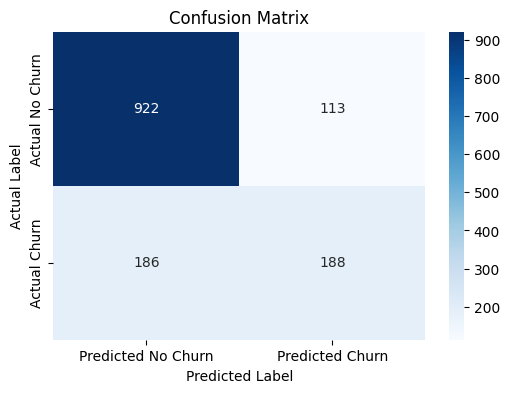

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Step 7: Feature Importance Analysis

This step identifies the most influential features that the Random Forest model used to predict customer churn. Understanding feature importance provides valuable business insights into what truly drives customer attrition, which can inform targeted retention strategies.

--- Top 10 Most Important Features: ---
TotalCharges                      0.191615
MonthlyCharges                    0.174860
tenure                            0.174704
InternetService_Fiber optic       0.049169
PaymentMethod_Electronic check    0.039228
Contract_Two year                 0.035199
gender                            0.028475
PaperlessBilling                  0.026382
OnlineSecurity_Yes                0.025073
Partner                           0.023340
dtype: float64


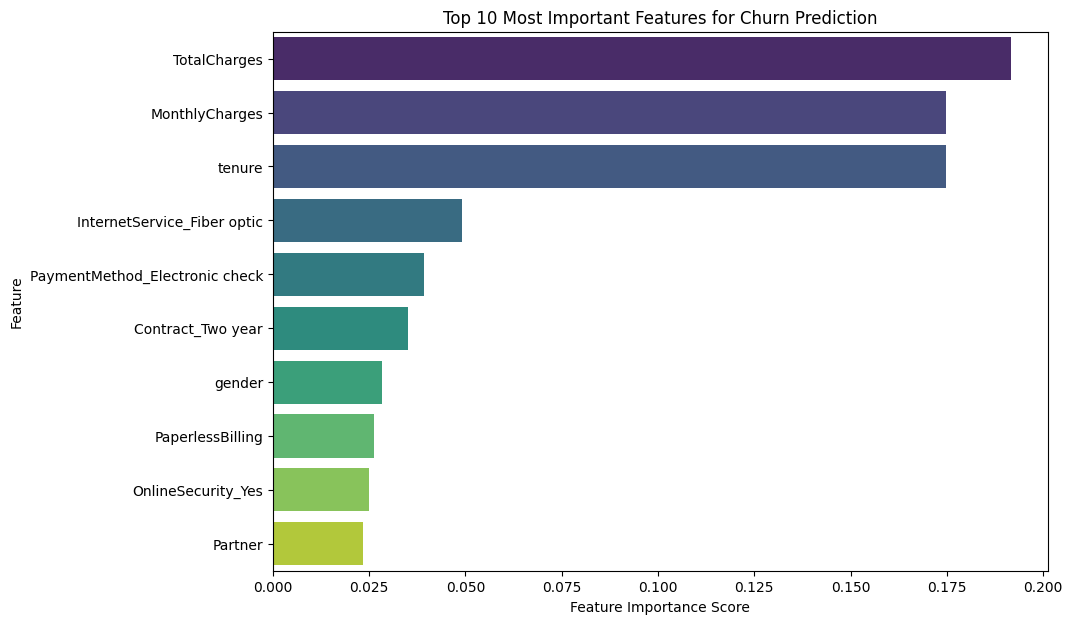

In [14]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.Series(feature_importances, index=features).sort_values(ascending=False)
print("--- Top 10 Most Important Features: ---")
print(importance_df.head(10))
plt.figure(figsize=(10, 7))
sns.barplot(x=importance_df.head(10).values, y=importance_df.head(10).index,
            palette='viridis', hue=importance_df.head(10).index, legend=False)
plt.title('Top 10 Most Important Features for Churn Prediction')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()